In [26]:
from pathlib import Path
import numpy as np

import geopandas as gpd

from GDRT.raster.register_images import align_two_rasters
from GDRT.raster.registration_algorithms import sitk_intensity_registration

In [27]:
DATA_FOLDER = "/ofo-share/scratch-david/georeferencing-experiments"

WHICH_DATASET = 3

dataset_ids = [
    ("630", "931"),
    ("919", "625"),
    ("921", "629"),
    ("618", "576"),
    ("612", "908"),
    ("911", "560")
][WHICH_DATASET]

FIXED_CHM_FILENAME = Path(DATA_FOLDER, "CHMs", f"chm-ptcloud-{dataset_ids[0]}.tif")
MOVING_CHM_FILENAME = Path(DATA_FOLDER, "CHMs", f"chm-ptcloud-{dataset_ids[1]}.tif")

ROI_FILE = Path(DATA_FOLDER, "ROIs.gpkg")

TARGET_GSD = 0.1

<Axes: >

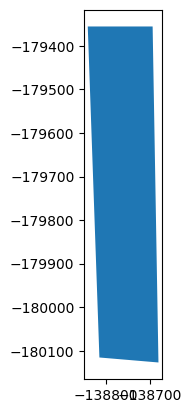

In [28]:
all_ROIs = gpd.read_file(ROI_FILE).to_crs(3310)
roi = all_ROIs.iloc[WHICH_DATASET:WHICH_DATASET+1]
roi.plot()

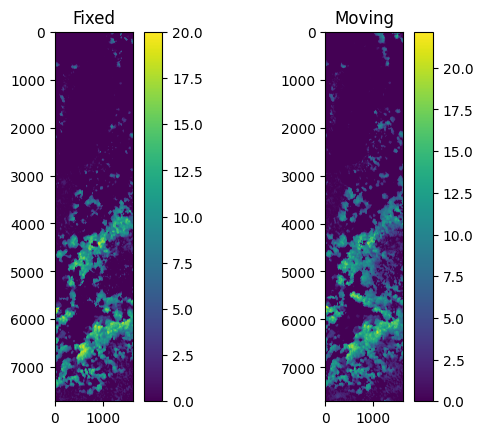

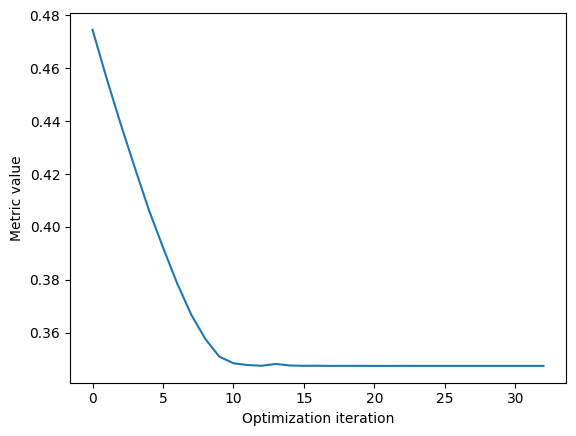

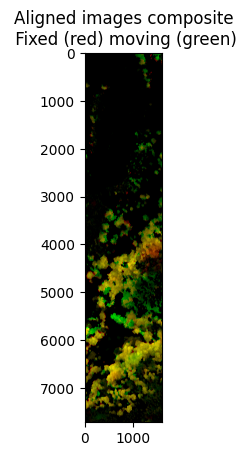

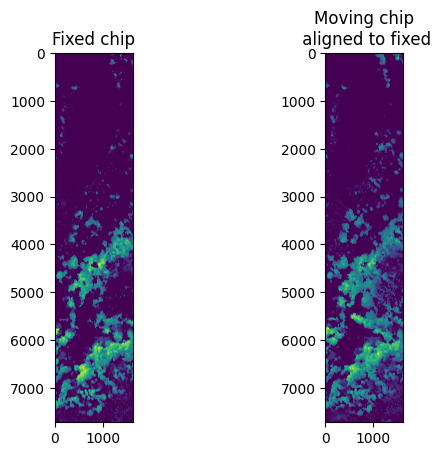

Estimated shift: [1.6641313704894856, -1.2765743634372484]


In [29]:
# TODO Convert to the appropriate CRS automatically
roi = roi.dissolve()

transforms = align_two_rasters(
    FIXED_CHM_FILENAME,
    MOVING_CHM_FILENAME,
    aligner_alg=sitk_intensity_registration,
    region_of_interest=roi,
    target_GSD=TARGET_GSD,
    vis_chips=True,
    vis_kwargs={},
    aligner_kwargs={"align_means": False}
)

mv2fx_tr = transforms["geospatial_mv2fx_transform"]
print(f"Estimated shift: {([mv2fx_tr[0, 2], mv2fx_tr[1, 2]])}")

In [30]:
predicted_shifts = np.array([
    [3.6988898223789874, -1.904615719729918],
    [1.2608225824660622, -0.04027151455375133],
    [2.0659556616737973, 1.3184839766763616],
    [1.6641313704894856, -1.2765743634372484],
    [0.5372727770300116, 0.8613312307279557],
    [-0.654457895871019, 0.7811114458017983],
])

manual_shifts = np.array([
    [3.67333011, -2.03344836],
    [1.21451527, 0.09520919],
    [2.6858655, 1.77633428],
    [1.81378553, -1.08913454],
    [0.57881108, 0.64201424],
    [-0.71228349, 0.94996558],
])
diffs = predicted_shifts - manual_shifts
discrepencies = np.linalg.norm(diffs, axis=1)
print(f"Discrepencies in meters between manual and predicted shifts: {discrepencies}")

Discrepencies in meters between manual and predicted shifts: [0.13134363 0.14317608 0.77065888 0.23985424 0.22321598 0.17848114]
